In [ ]:
!nvidia-smi

Tue May 14 12:24:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import tensorflow.keras.regularizers as regularizers
l2_regularizer = regularizers.l2(0.001)
import tensorflow as tf
from tensorflow.keras.regularizers import l2
# regularizer = l2(0.001)

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode= checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'train', 'benchmark', 'export', 'track', 'val', 'predict'}.

    Arguments received: ['yolo', 'mode=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'classify', 'pose', 'obb', 'segment'}
                MODE (required) is one of {'train', 'benchmark', 'export', 'track', 'val', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS a

In [ ]:
!pip install bbox


In [ ]:
%matplotlib inline
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LAVlZ4gjwlnGTdQ6HRBA")
project = rf.workspace("college-fhobi").project("banana-yoyko")
version = project.version(3)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to banana-3 in yolov8:: 100%|██████████| 2300/2300 [00:00<00:00, 5848.97it/s]


In [ ]:
# work training

import os
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('/content/banana-3/train')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/banana-3/data.yaml', epochs=50, imgsz=640)


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


100%|██████████| 6.23M/6.23M [00:00<00:00, 114MB/s]

Transferred 355/355 items from pretrained weights


Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/banana-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/banana-3/train/labels... 1034 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1034/1034 [00:00<00:00, 1891.18it/s]

train: New cache created: /content/banana-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/banana-3/valid/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1031.81it/s]

val: New cache created: /content/banana-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.46G      1.233      1.737      1.751         23        640: 100%|██████████| 65/65 [00:28<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         80         80      0.646      0.662       0.69      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.27G       1.28      1.261      1.777         29        640: 100%|██████████| 65/65 [00:28<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         80         80      0.747      0.739      0.758       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.29G      1.276       1.17      1.764         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         80         80       0.76      0.912      0.862      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G       1.27       1.05       1.76         22        640: 100%|██████████| 65/65 [00:28<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80         80      0.693       0.82      0.808      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.29G      1.237     0.9674      1.718         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         80         80       0.96       0.95      0.932      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.29G      1.243     0.9324      1.722         29        640: 100%|██████████| 65/65 [00:26<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         80         80      0.795      0.776      0.827      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G      1.209       0.89      1.696         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]


                   all         80         80      0.949      0.923      0.938      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.28G      1.199     0.8765       1.68         26        640: 100%|██████████| 65/65 [00:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         80         80      0.875      0.873      0.792      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.203      0.872       1.68         33        640: 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         80         80      0.858       0.91      0.901      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G       1.16     0.8151      1.655         23        640: 100%|██████████| 65/65 [00:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         80         80      0.915       0.95      0.917      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.29G      1.133     0.8202      1.635         24        640: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         80         80      0.949       0.95      0.925      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.158     0.8274      1.666         33        640: 100%|██████████| 65/65 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80         80      0.922      0.891      0.935      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.29G      1.134     0.7986      1.623         30        640: 100%|██████████| 65/65 [00:26<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         80         80      0.927       0.95      0.915       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.27G      1.151     0.7962      1.639         27        640: 100%|██████████| 65/65 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         80         80      0.949      0.963      0.942      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G      1.128     0.7765      1.627         23        640: 100%|██████████| 65/65 [00:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         80         80      0.887      0.887      0.816      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G      1.117     0.7534      1.612         30        640: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         80         80      0.937      0.963      0.944      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.27G      1.102     0.7162      1.592         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         80         80      0.962      0.963      0.946      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.27G      1.075      0.754      1.579         28        640: 100%|██████████| 65/65 [00:26<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         80         80       0.95      0.963      0.933        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.27G      1.074     0.7329      1.579         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         80         80      0.972      0.975      0.981        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.076      0.712      1.589         26        640: 100%|██████████| 65/65 [00:27<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         80         80      0.949      0.963       0.94       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.061     0.7056      1.555         38        640: 100%|██████████| 65/65 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80         80      0.938      0.953      0.931      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.27G      1.087     0.7169      1.582         34        640: 100%|██████████| 65/65 [00:25<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         80         80      0.973      0.975      0.962      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.27G      1.064     0.7152      1.575         29        640: 100%|██████████| 65/65 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         80         80      0.939      0.963      0.939      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.042     0.7114      1.548         24        640: 100%|██████████| 65/65 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         80         80      0.936      0.963      0.922      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.27G       1.04      0.702      1.539         30        640: 100%|██████████| 65/65 [00:24<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         80         80      0.952      0.975      0.966      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.29G      1.031     0.6611      1.543         29        640: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         80         80      0.961      0.963      0.931      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.27G      1.019     0.6857       1.53         27        640: 100%|██████████| 65/65 [00:27<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         80         80       0.95      0.963      0.943      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G      1.012     0.6692      1.528         36        640: 100%|██████████| 65/65 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         80         80       0.95      0.954      0.952      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.27G      1.016     0.6703      1.527         25        640: 100%|██████████| 65/65 [00:24<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]

                   all         80         80      0.962      0.961      0.948      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.27G      1.004     0.6593      1.521         24        640: 100%|██████████| 65/65 [00:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         80         80       0.95       0.96      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.27G      1.014     0.6664      1.519         31        640: 100%|██████████| 65/65 [00:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80         80      0.974      0.975      0.957      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.28G     0.9809     0.6509      1.501         26        640: 100%|██████████| 65/65 [00:27<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         80         80      0.962      0.975      0.947      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.27G     0.9701     0.6202      1.499         29        640: 100%|██████████| 65/65 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         80         80      0.961      0.963      0.943       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.27G       0.98     0.6415      1.501         31        640: 100%|██████████| 65/65 [00:25<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         80         80       0.96      0.963      0.938      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.27G     0.9534      0.607      1.479         28        640: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         80         80      0.939      0.969      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G     0.9416     0.5996      1.459         31        640: 100%|██████████| 65/65 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         80         80      0.974      0.988      0.978      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G     0.9384     0.6137      1.474         31        640: 100%|██████████| 65/65 [00:27<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         80         80      0.961      0.963      0.945      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.27G     0.9391     0.5954      1.472         29        640: 100%|██████████| 65/65 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         80         80      0.962      0.963      0.939       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.27G     0.9437     0.6078      1.476         33        640: 100%|██████████| 65/65 [00:25<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         80         80      0.951      0.962      0.932      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G     0.9478     0.6231       1.47         26        640: 100%|██████████| 65/65 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80         80      0.961      0.963      0.947      0.642


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.41G      0.824     0.4712      1.615         10        640: 100%|██████████| 65/65 [00:25<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         80         80      0.975      0.974      0.958      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G     0.7786     0.4178      1.581         10        640: 100%|██████████| 65/65 [00:23<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80         80      0.949      0.975      0.959      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.27G     0.7809     0.4246      1.588         10        640: 100%|██████████| 65/65 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         80         80      0.962      0.956      0.942       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G     0.7694     0.4162      1.553         10        640: 100%|██████████| 65/65 [00:24<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         80         80       0.95      0.963      0.939      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.27G     0.7532     0.4024      1.537         10        640: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         80         80      0.962      0.962      0.942      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.27G     0.7513     0.4022      1.519         10        640: 100%|██████████| 65/65 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         80         80      0.962      0.963      0.951      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G     0.7333     0.4002      1.512         10        640: 100%|██████████| 65/65 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         80         80      0.961      0.975      0.956      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.26G     0.7272     0.3897      1.521         10        640: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80         80      0.962      0.963       0.94      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.27G     0.7003     0.3878      1.493         10        640: 100%|██████████| 65/65 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         80         80      0.961      0.963      0.937      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.27G     0.6942     0.3773      1.491         10        640: 100%|██████████| 65/65 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         80         80      0.962      0.963       0.94      0.671



50 epochs completed in 0.381 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


                   all         80         80      0.962      0.963       0.94       0.67
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/YOLO_model2.h5')  # Change path as necessary

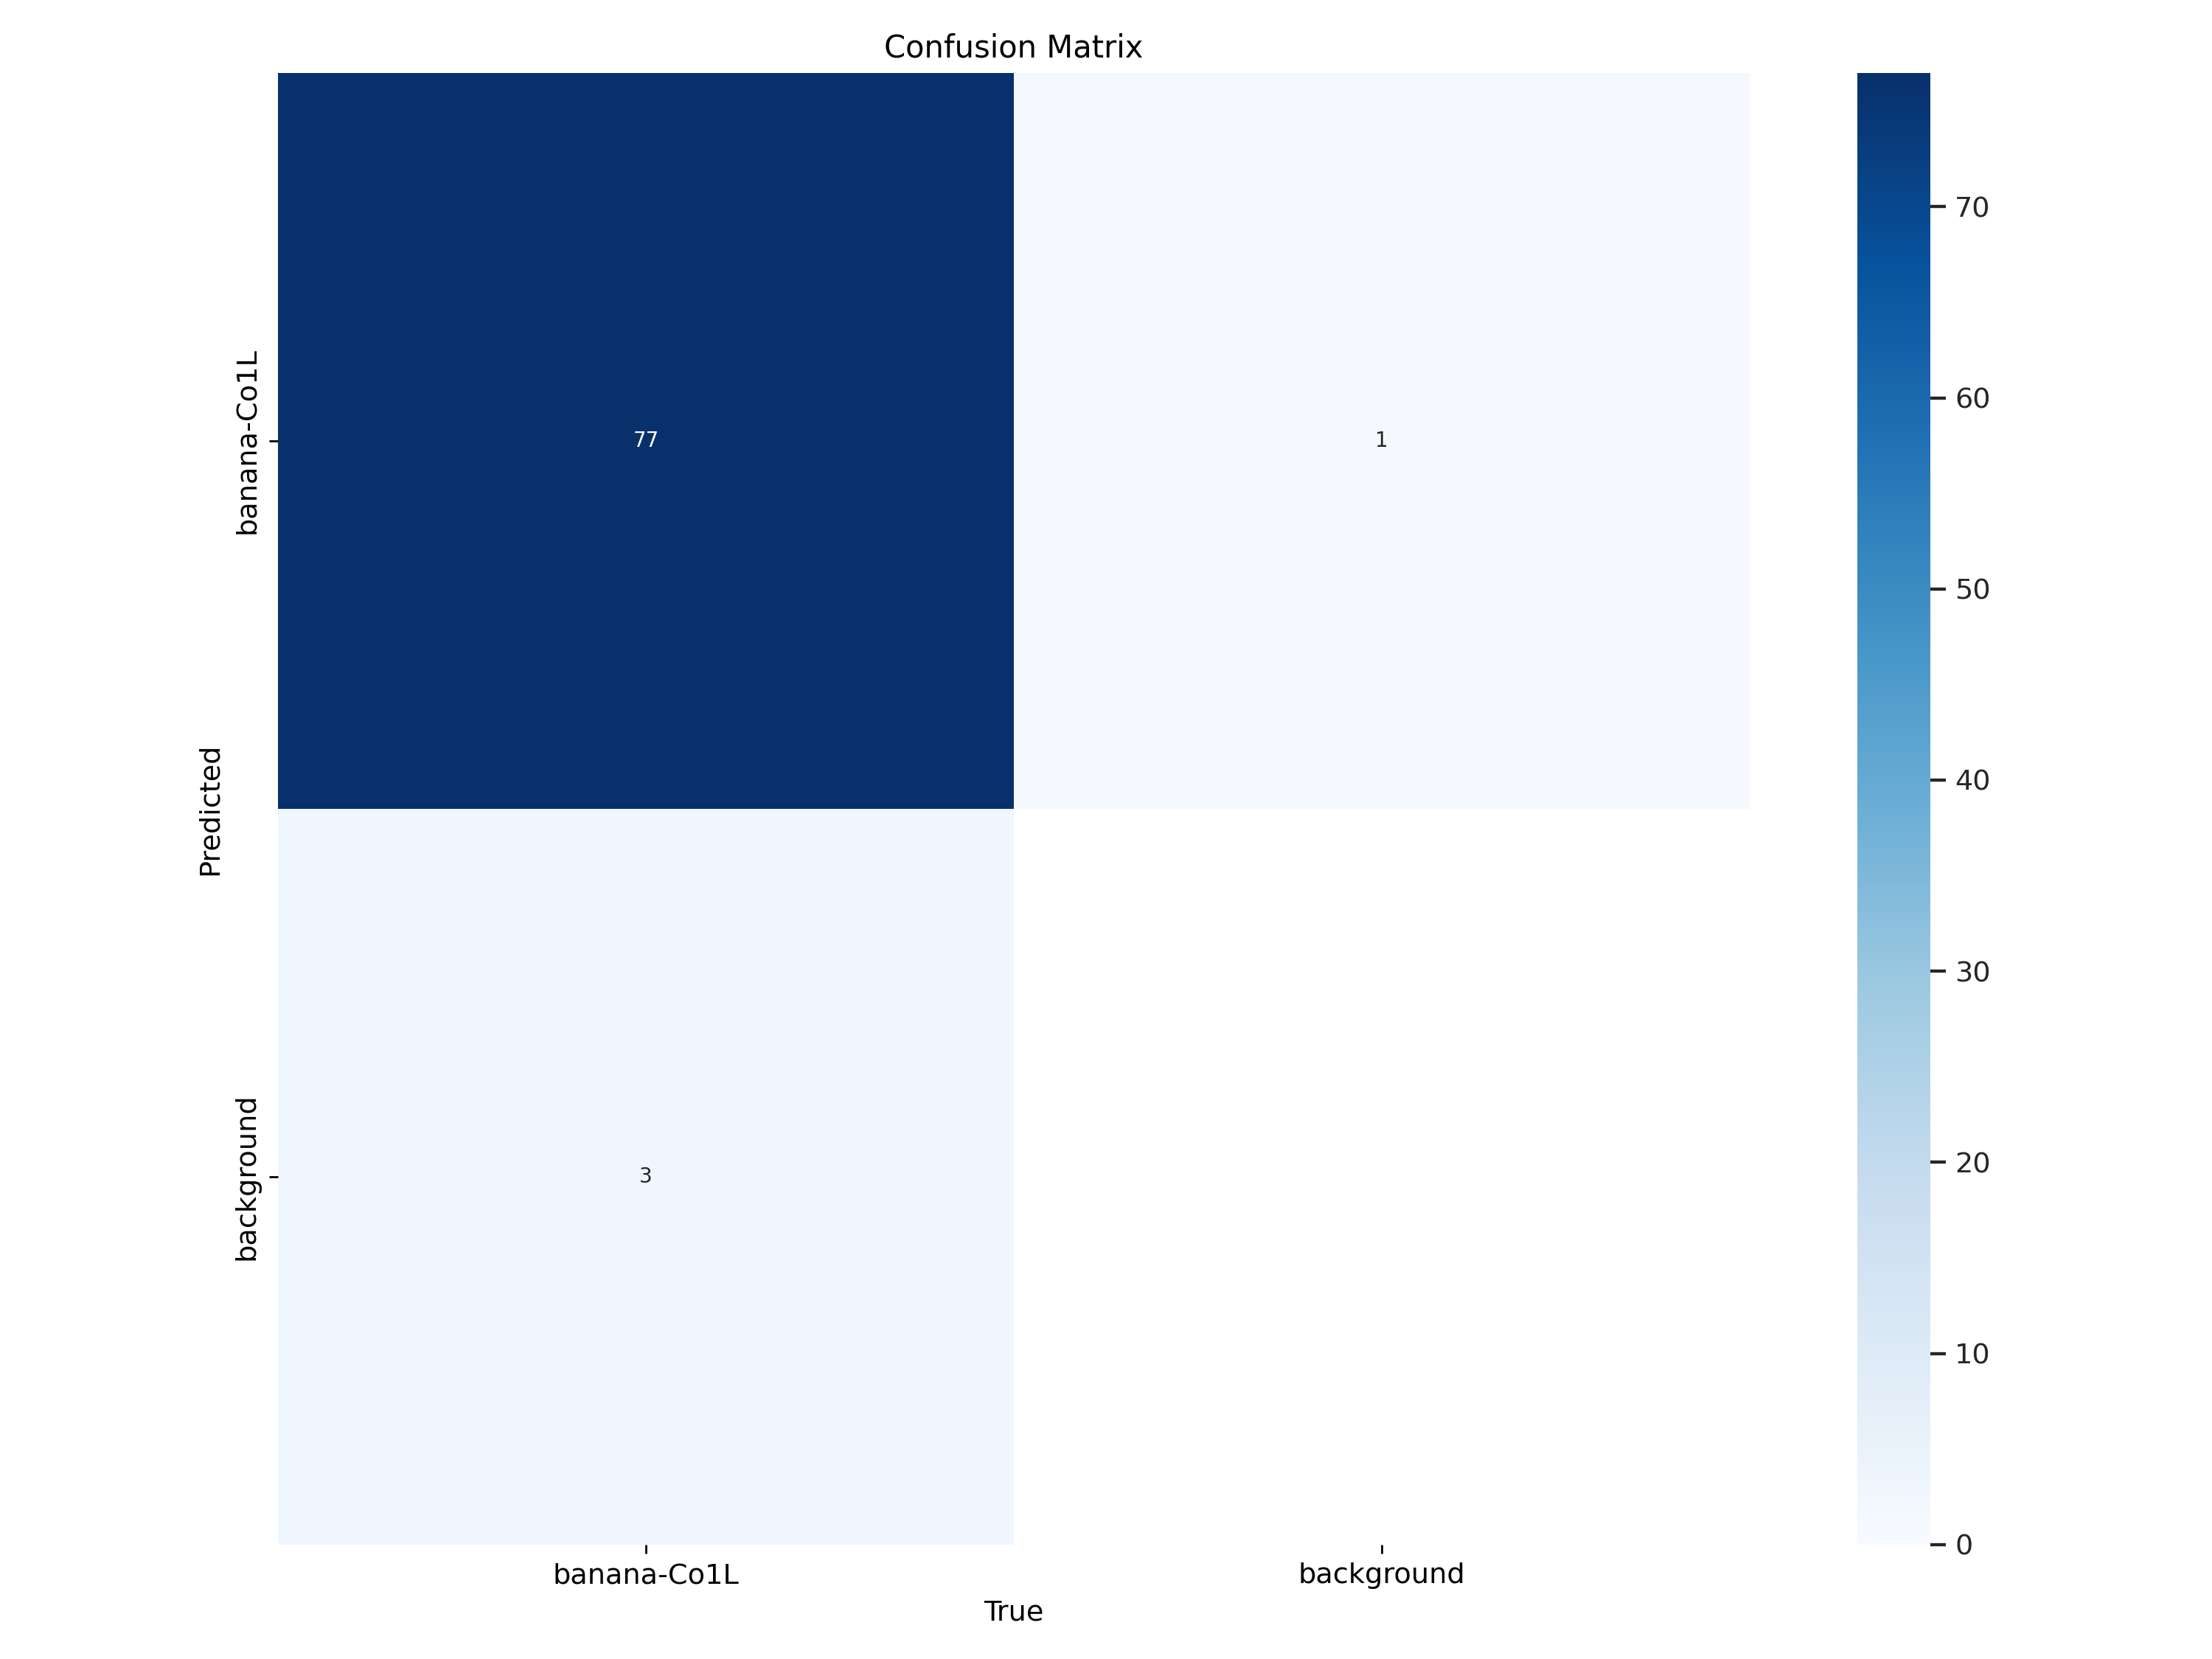

In [ ]:
# This code will display the confusion matrix image that is saved in the /content/runs/detect/train/ directory.
from IPython.display import Image
Image(filename = f'/content/runs/detect/train/confusion_matrix.png',width=600)


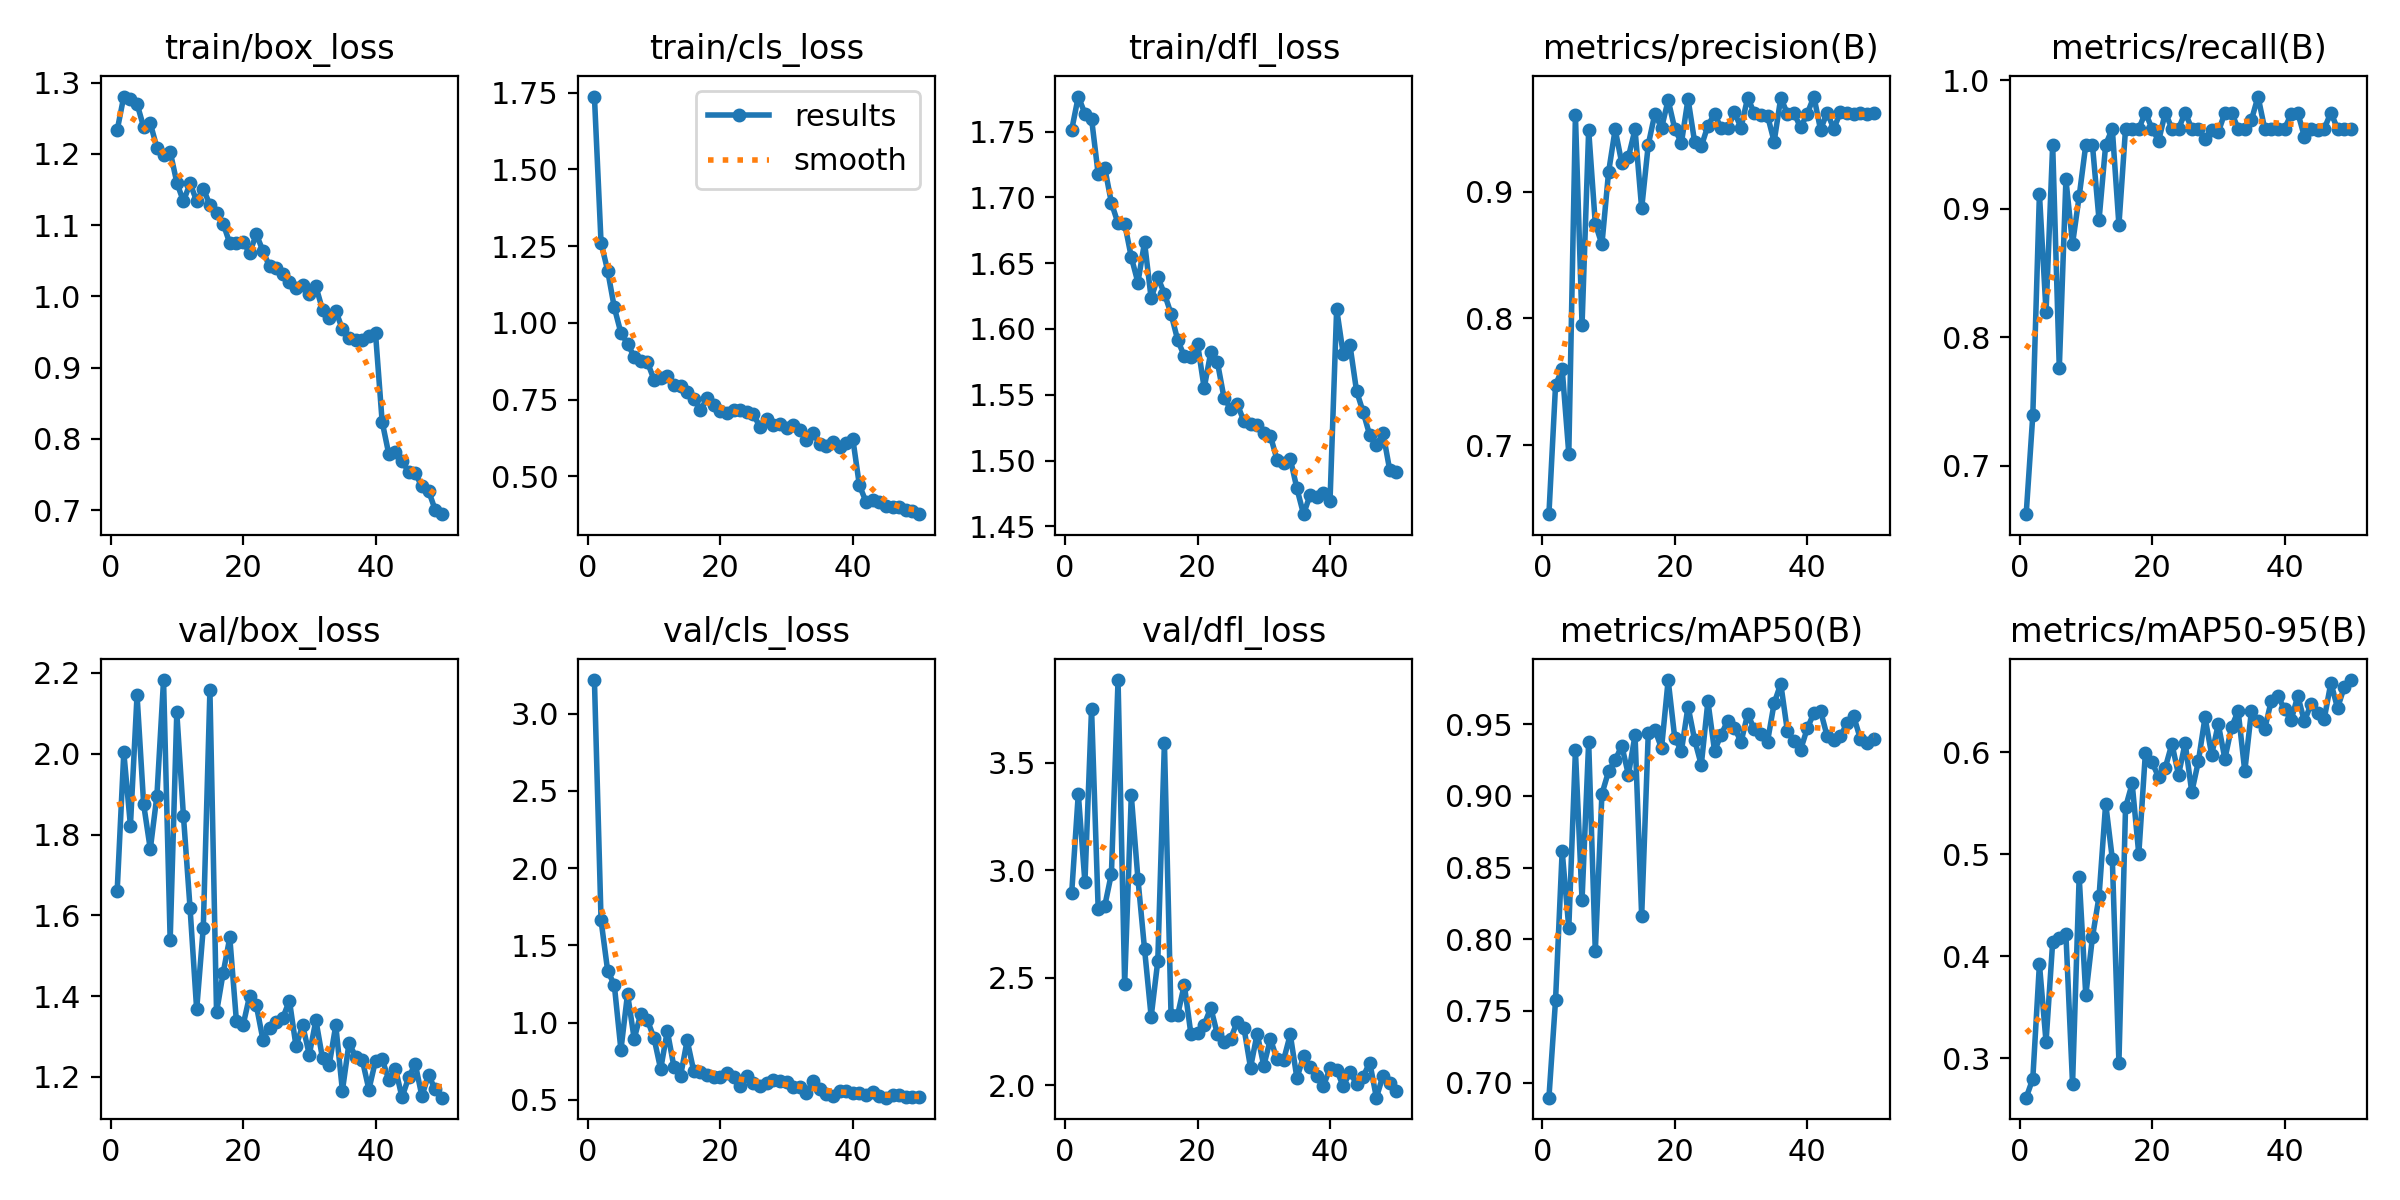

In [ ]:
Image(filename = f'/content/runs/detect/train/results.png',width=600)

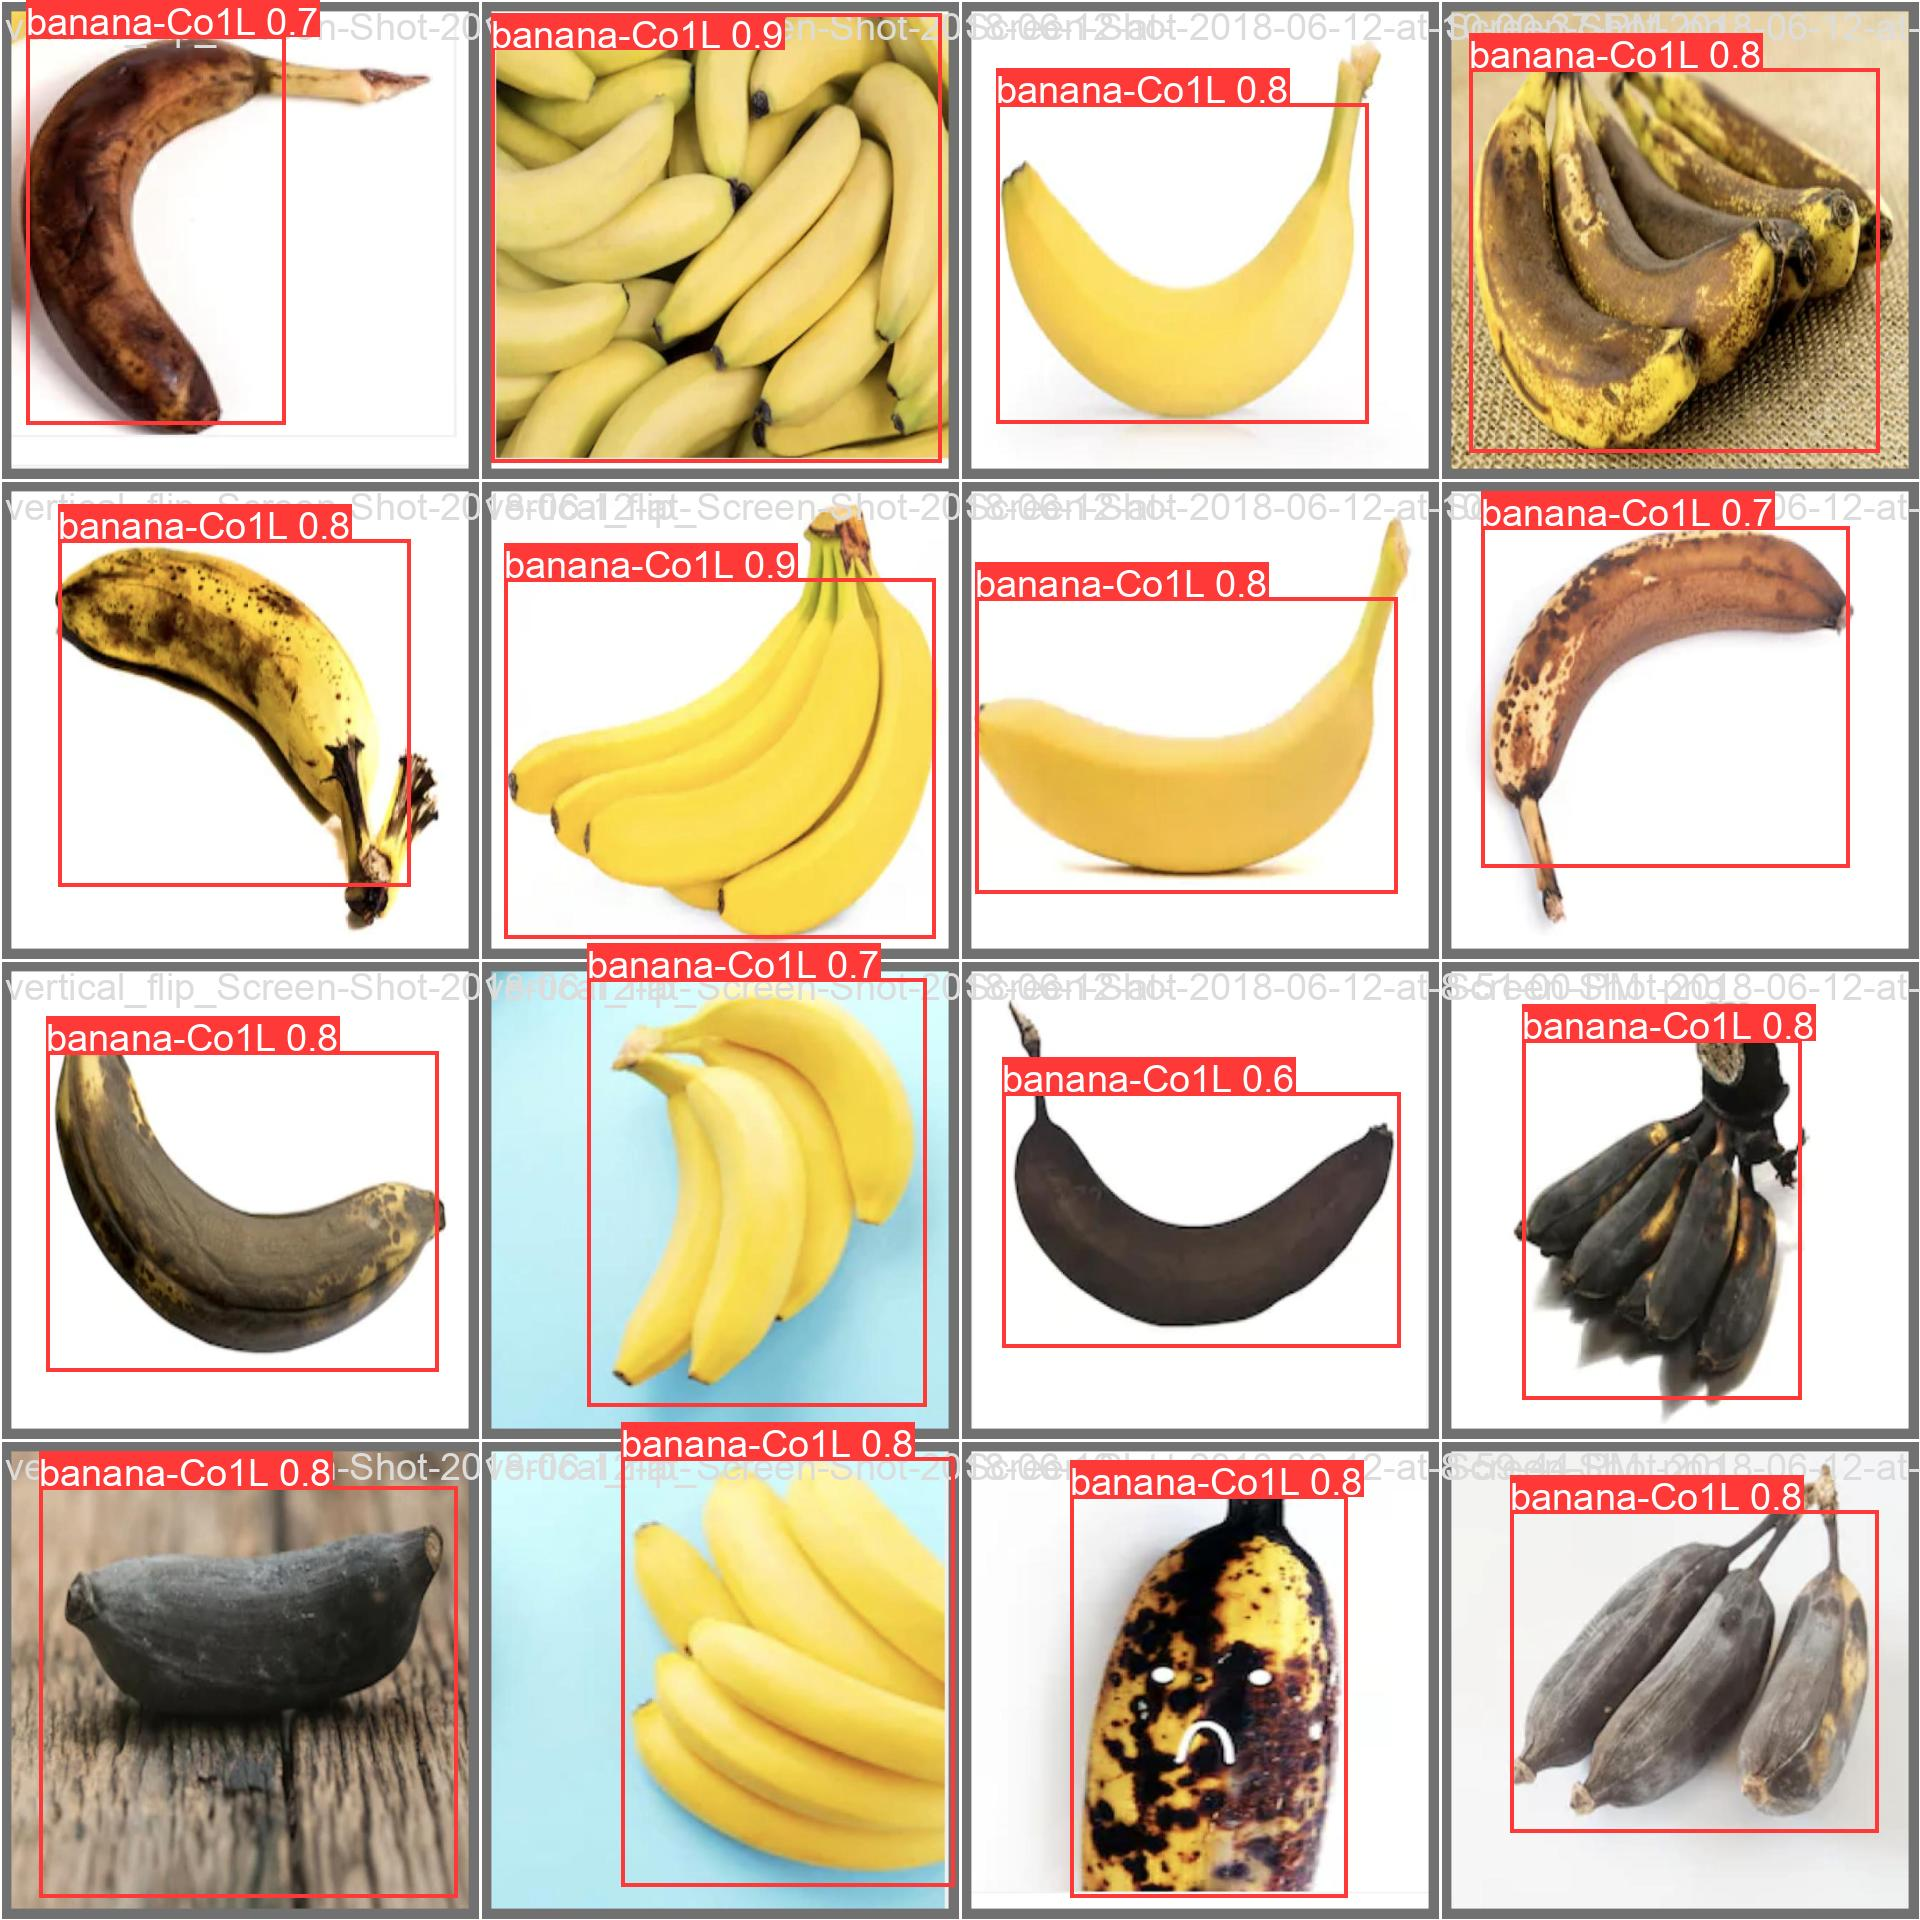

In [ ]:
Image(filename = f'/content/runs/detect/train/val_batch0_pred.jpg',width=600)

CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your dataset directory
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Define image size
image_height, image_width = 255,255

# Function to load and preprocess images
def load_images(dataset_dir):
    images = []
    labels = []
    for category in os.listdir(dataset_dir):
        category_dir = os.path.join(dataset_dir, category)
        label = 1 if category == 'fresh' else 0  # Assign labels (0 or 1) based on folder names
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_height, image_width))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
images, labels = load_images(dataset_dir)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


print(train_labels[1])
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
plt.show()


0


In [ ]:
train_labels[:5]

array([0, 0, 0, 0, 1])

In [ ]:

class_names = ['Stale', 'Fresh']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    axs[i // 3, i % 3].imshow(train_images[i])
    axs[i // 3, i % 3].set_title(f"Class: {class_names[train_labels[i]]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
num_channels=3
model2 = models.Sequential()

# Convolutional layers
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))



# Flatten layer
model2.add(layers.Flatten())

# Dense layers
model2.add(layers.Dense(255, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history=model2.fit(train_images, train_labels, epochs=50, validation_data=(train_images, train_labels))


Epoch 1/50
23/23 [==============================] - 16s 332ms/step - loss: 0.5786 - accuracy: 0.6786 - val_loss: 0.3354 - val_accuracy: 0.9093
Epoch 2/50
23/23 [==============================] - 2s 93ms/step - loss: 0.2427 - accuracy: 0.9093 - val_loss: 0.1598 - val_accuracy: 0.9258
Epoch 3/50
23/23 [==============================] - 2s 93ms/step - loss: 0.1078 - accuracy: 0.9670 - val_loss: 0.0424 - val_accuracy: 0.9918
Epoch 4/50
23/23 [==============================] - 2s 90ms/step - loss: 0.0455 - accuracy: 0.9890 - val_loss: 0.1346 - val_accuracy: 0.9519
Epoch 5/50
23/23 [==============================] - 2s 92ms/step - loss: 0.2080 - accuracy: 0.9492 - val_loss: 0.0456 - val_accuracy: 0.9904
Epoch 6/50
23/23 [==============================] - 3s 124ms/step - loss: 0.0644 - accuracy: 0.9835 - val_loss: 0.0208 - val_accuracy: 0.9959
Epoch 7/50
23/23 [==============================] - 2s 102ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 0.0174 - val_accuracy: 0.9890
Epoch 8/5

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)


6/6 [==============================] - 1s 220ms/step - loss: 0.0187 - accuracy: 0.9945


In [ ]:

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy values
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot training and validation loss values
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Plot training history
plot_training_history(history)


In [ ]:
# Save in HDF5 format
model2.save('/content/drive/My Drive/CNN_model.h5')


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose a random image from the dataset
random_image_path = random.choice(image_files)

# Preprocess the random image
input_image = preprocess_image(random_image_path)

# Get prediction for the random image
predictions = model2.predict(input_image)
predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

# Display the random image along with its predicted class
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 710ms/step


1/1 [==============================] - 0s 74ms/step


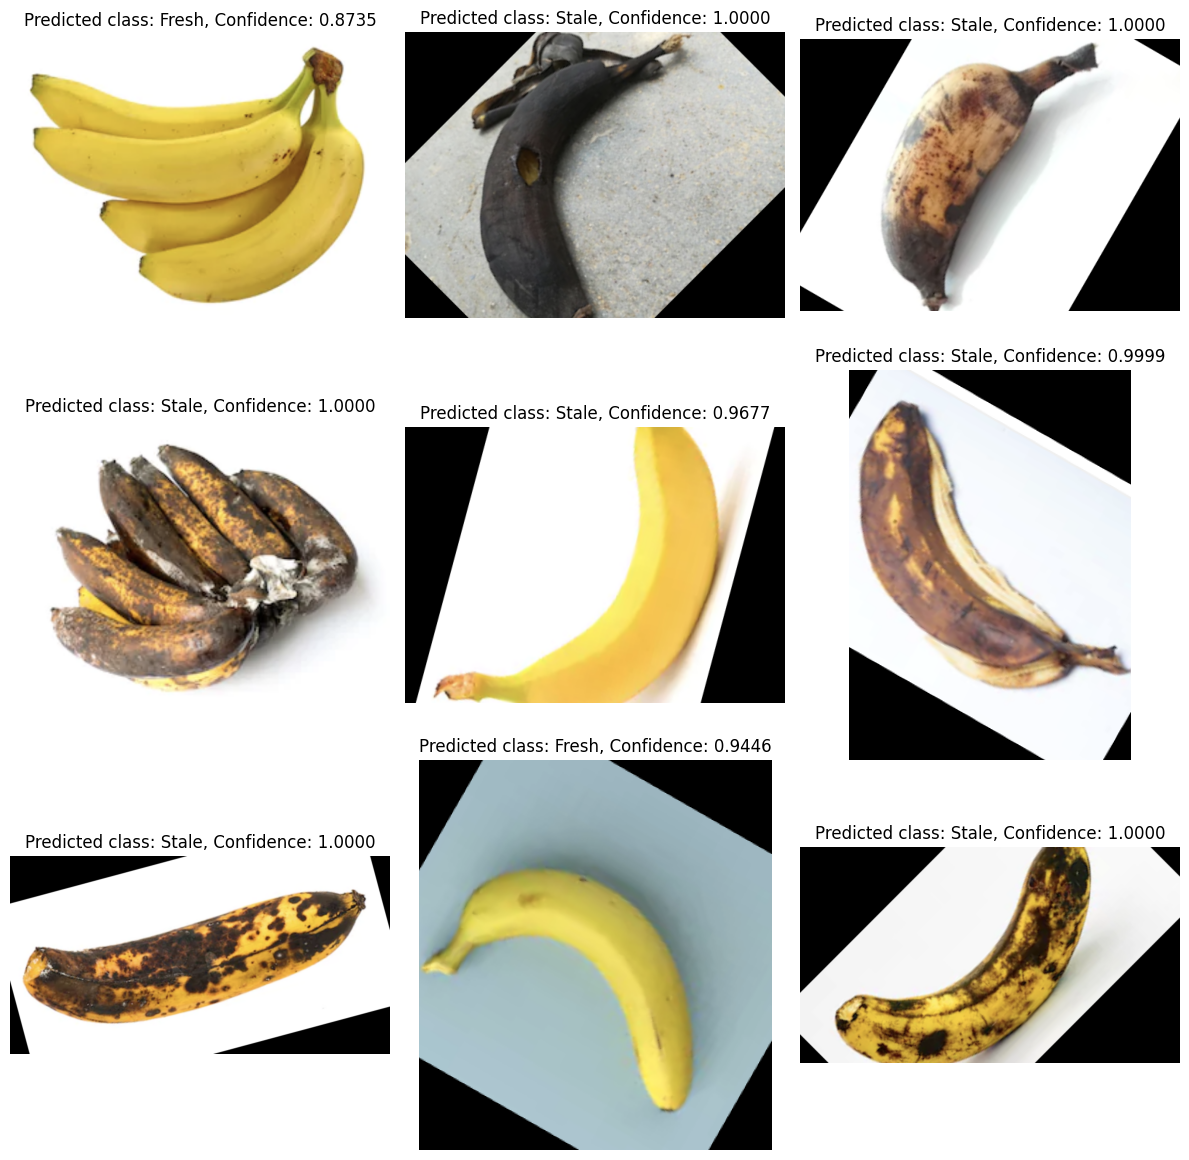

In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose 9 random images from the dataset
random_image_paths = random.sample(image_files, 9)

# Create a subplot with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Loop through each random image
for i, image_path in enumerate(random_image_paths):
    # Preprocess the image
    input_image = preprocess_image(image_path)

    # Get prediction for the image
    predictions = model2.predict(input_image)
    predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
    confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

    # Display the image along with its predicted class
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


### Start Testing

In [ ]:
import os.path
from os import path

if path.exists('/content/banana_yolo_cut_picture') == False:
  os.mkdir('/content/banana_yolo_cut_picture')

os.chdir('/content/banana_yolo_cut_picture')


In [ ]:
from ultralytics import YOLO

import cv2

# Load the YOLOv8 model
model = YOLO('/content/yolov8n.pt')

# Perform inference on an image
results = model('/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg')

# Load the original image
image = "/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg"
img = cv2.imread(image)

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

new_path='/content/banana_yolo_cut_picture'

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Save the cropped object as an image
    cv2.imwrite('/content/banana_yolo_cut_picture/ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)


image 1/1 /content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg: 640x480 1 person, 1 banana, 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Input image:


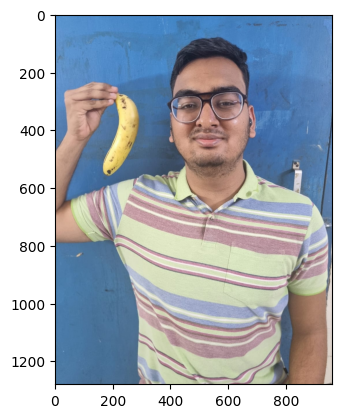

1/1 [==============================] - 0s 21ms/step
Predicted class: fresh_banana
Confidence: 0.9958480070345104


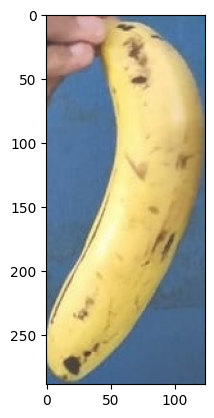

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path2='/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg'
print("Input image:")
testImage2 = img.imread(image_path2)

# displaying the image
plt.imshow(testImage2)
# plt.imshow(image_path)
plt.show()

# Load the trained model
# model = tf.keras.models.load_model('/content/drive/MyDrive/minar_project_dataset/train/stale_apple/Screen Shot 2018-06-07 at 2.15.50 PM.png')

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Example usage: Get prediction for a single image
# image_path = '/content/drive/MyDrive/Image/image3.jpg'

image_path = '/content/banana_yolo_cut_picture/ultralytics_crop_1.jpg'
# image_path = '/content/drive/MyDrive/minar_project_dataset/test/stale_apple/vertical_flip_Screen Shot 2018-06-08 at 2.29.33 PM.png'

input_image = preprocess_image(image_path)
predictions = model2.predict(input_image)

# Interpret the predictions
predicted_class = "fresh_banana" if predictions[0][0] > 0.5 else "stale_banana"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "fresh_banana|" else 1 - predictions[0][0]  # Confidence score
print("Predicted class:", predicted_class)
print("Confidence:", confidence)



# reading the image
testImage = img.imread(image_path)

# displaying the image
plt.imshow(testImage)
# plt.imshow(image_path)
plt.show()